In [18]:
# Importing essential libraries for data manipulation, visualization, and machine learning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Load the dataset and perform initial data exploration
df = pd.read_csv('ds_salaries.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

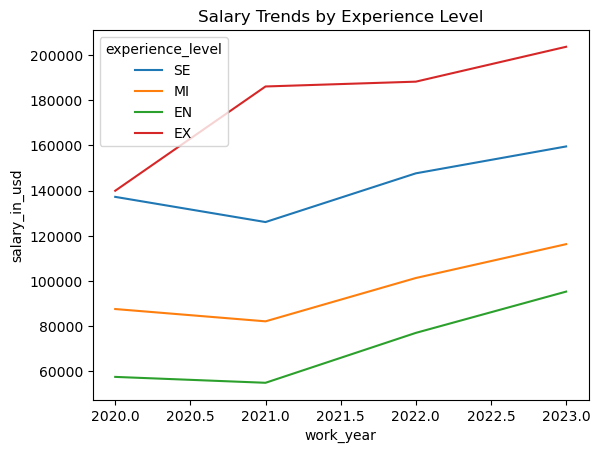

In [20]:
# Create a line plot to visualize how average salaries in USD have changed over the years
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='experience_level', errorbar=None)
plt.title('Salary Trends by Experience Level')
plt.show()

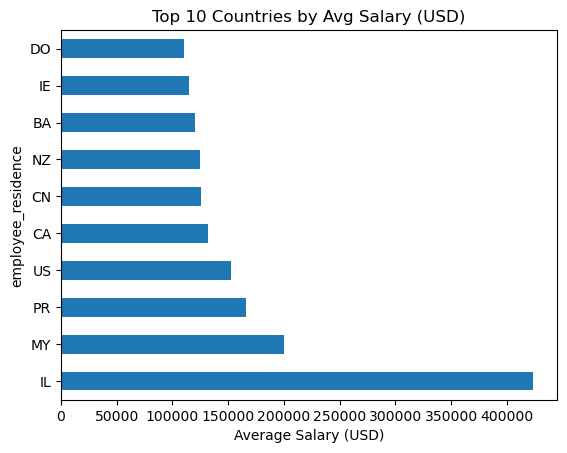

In [21]:
# Analyze and visualize the top 10 countries with the highest average data science salaries
top_countries = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='barh', title='Top 10 Countries by Avg Salary (USD)')
plt.xlabel('Average Salary (USD)')
plt.show()

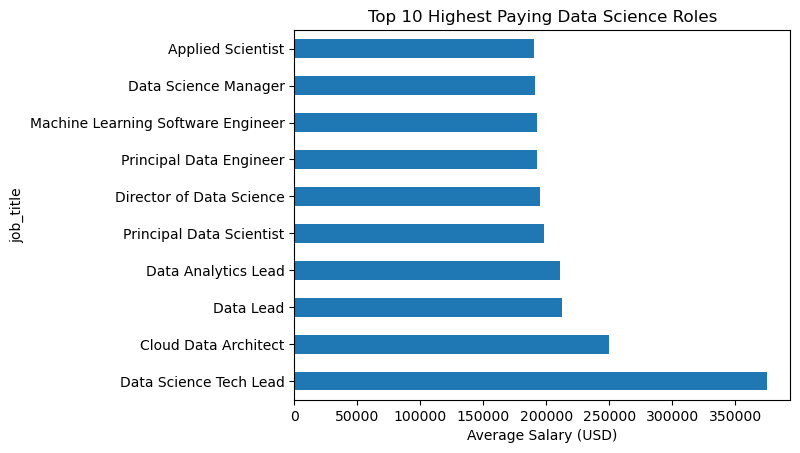

In [22]:
# Identify and visualize the top 10 highest-paying data science job titles
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_jobs.plot(kind='barh', title='Top 10 Highest Paying Data Science Roles')
plt.xlabel('Average Salary (USD)')
plt.show()

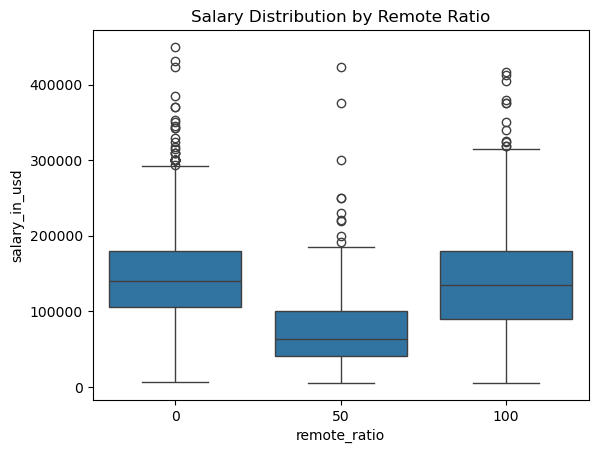

In [6]:
# Create a box plot to visualize the distribution of salaries in USD across different remote work ratios
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd')
plt.title('Salary Distribution by Remote Ratio')
plt.show()


In [23]:
# Select features and target
features = ['experience_level', 'employment_type', 'job_title', 'company_size', 'remote_ratio']
target = 'salary_in_usd'

X = df[features]
y = df[target]

In [24]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'job_title', 'company_size'], drop_first=True)


In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [26]:
# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3118140887.16
R² Score: 0.21


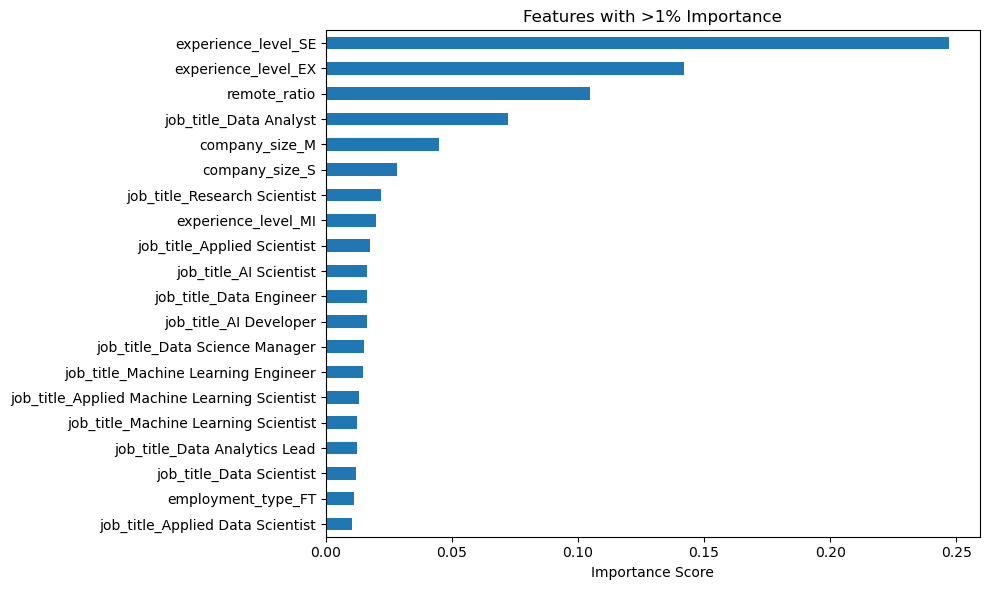

In [16]:
# Get feature importances from the trained Random Forest model
importances = pd.Series(model.feature_importances_, index=X_encoded.columns)

# Filter features with importance greater than 1%
threshold = 0.01
important_features = importances[importances > threshold]

# Plot the filtered important features
important_features.sort_values().plot(kind='barh', figsize=(10, 6), title='Features with >1% Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

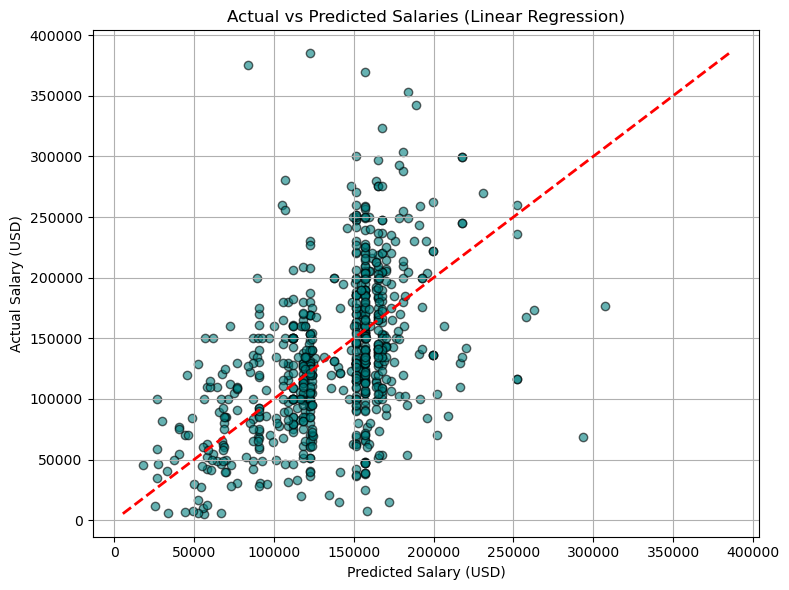

In [27]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.6, color='teal', edgecolors='k')

# Reference line (perfect prediction)
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Actual Salary (USD)')
plt.title('Actual vs Predicted Salaries (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()
